Github repo link: https://github.com/zihanzhao1029/ML-project_HW2

Citation of paper providing original dataset:  M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, “Can AI help in screening Viral and COVID-19 pneumonia?” arXiv preprint, 29 March 2020, https://arxiv.org/abs/2003.13145

## 1. Visualize images that demonstrate when x-rays demonstrate Covid Positivity and when they do not (You can present visuals of each category in the data if you would like to.).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Connect to google drive
import os
from google.colab import drive
drive.mount('/content/drive')

# content in your drive is now available via "/content/drive/My Drive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data and unzip files to folder
!unzip /content/drive/MyDrive/COVID-19_Radiography_Dataset.zip

In [4]:
# # Extracting all file in dataset
import os
import zipfile

base_path = 'COVID-19_Radiography_Dataset'

# redefine category to show only covid postive or not
categories = ['COVID/images', 'Normal/images','Viral Pneumonia/images','Lung_Opacity/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file name

number of images for each category: [3616, 10192, 1345, 6012]
[['COVID-19_Radiography_Dataset/COVID/images/COVID-2000.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2384.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1478.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3581.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1631.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1395.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2631.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-436.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2890.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3234.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2248.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-2699.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-3359.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1600.png', 'COVID-19_Radiography_Dataset/COVID/images/COVID-1501.png', 'COVID-19_Radiography_Dataset/COVID/i

In [5]:
#Reduce number of images to first 1345 for each category
fnames[0]=fnames[0][0:1344]  #COVID/images
fnames[1]=fnames[1][0:1344]  #Normal/images
fnames[2]=fnames[2][0:1344]  #Viral Pneumonia/images
fnames[3]=fnames[3][0:1344]  #Lung_Opacity/images

In [6]:
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.
from keras.preprocessing import image
import numpy as np
from PIL import Image

def preprocessor(img_path):
        img = Image.open(img_path).convert("RGB").resize((192,192)) # import image, make sure it's RGB and resize to height and width you want.
        img = (np.float32(img)-1.)/(255-1.) # min max transformation
        img=img.reshape((192,192,3)) # Create final shape as array with correct dimensions for Keras
        return img



#Try on single flower file (imports file and preprocesses it to data with following shape)
preprocessor('COVID-19_Radiography_Dataset/COVID/images/COVID-2273.png').shape

(192, 192, 3)

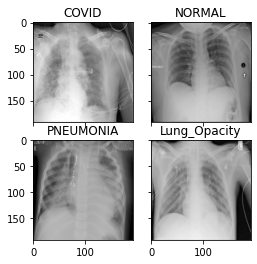

In [ ]:
# Visualize each category in dataset

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor(fnames[0][0]) 
im2 =preprocessor(fnames[1][0])
im3 =preprocessor(fnames[2][0])
im4 =preprocessor(fnames[3][0])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2), 
                 axes_pad=0.25,  # pad between axes in inch.
                 )

title=['COVID','NORMAL','PNEUMONIA','Lung_Opacity']

for ax, im,title in zip(grid, [im1, im2, im3,im4],title):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title(title)

plt.show()

## 2.Discuss the dataset in general terms and describe why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.

#### This dataset uses X-ray images to check covid-19 cases including four categories: covid postive, normal, pneumonia and lung_opacity without covid.And the data is collected from differernt sources
#### (github,tweet,kaggle and medical school).
#### predictive model could be trained to accurately classify X-ray images as Covid-positive, normal, pneumonia, or lung_opacity without Covid. This could potentially help doctors and healthcare professionals to quickly and accurately diagnose Covid-19 cases, allowing for earlier treatment and potentially reducing the spread of the disease.

## 3.Run at least three prediction models to try to predict x-ray images well.
## Use transfer learning for at least one of these models
## Discuss which models performed better and point out relevant hyper-parameter values for successful models.
## Submit your best three models to the leader board for the Covid X-ray Diagnostic AI Model Share competition.

In [7]:
# Define X,y in dataset
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [8]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

print('number of images for each category:', [len(f) for f in fnames[:3]])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))


#combine into single list of y labels
y_labels = covid+normal+pneumonia

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4027,0,0,1
4028,0,0,1
4029,0,0,1
4030,0,0,1


In [9]:
# Train test split resized images 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.32, random_state = 1987)


X_train.shape, y_train.shape

((2741, 192, 192, 3), (2741, 3))

In [10]:
#Save data to be able to reload quickly if memory crashes or if you run Runtime>Restart Runtime
import pickle

# Open a file and use dump()
with open('X_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_train, file)

#Save data
import pickle

# Open a file and use dump()
with open('X_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(X_test, file)

#Save data
import pickle

# Open a file and use dump()
with open('y_train.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_train, file)


# Open a file and use dump()
with open('y_test.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(y_test, file)

In [11]:
#If you run out of Colab memory restart runtime, reload data and try again
import pickle
  
# Open the file in binary mode
with open('X_train.pkl', 'rb') as file:
    # Call load method to deserialze
    X_train = pickle.load(file)

# Open the file in binary mode
with open('y_train.pkl', 'rb') as file:
    # Call load method to deserialze
    y_train = pickle.load(file)

In [ ]:
# Use  Neural network model to predict the dataset:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

      model = Sequential()
      model.add(Dense(128,  input_shape=(192, 192, 3), activation='relu'))
      model.add(Dense(128, activation='relu'))
      model.add(Dense(128, activation='relu'))
      model.add(Dense(64, activation='relu'))
      model.add(Flatten())
      model.add(Dense(3, activation='softmax')) 
                                                  
      # Compile model
      opt = SGD(learning_rate=[0.001])
      model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

      # Fitting the NN to the Training set
      model.fit(X_train, y_train, 
                    epochs = 1, verbose=1,validation_data=(X_test,y_test))

86/86 [==============================] - 1086s 13s/step - loss: 0.7970 - accuracy: 0.6414 - val_loss: 0.6383 - val_accuracy: 0.7312


In [ ]:
model.save("model1.h5", save_format="h5")  # model version 55 in leaderboard

In [13]:
# Use Convolutional Neural Net model to predict the dataset:
import tensorflow as tf

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

  model = tf.keras.Sequential([
    # input: images of size Sample size, height, width, channels 1x192x192x3 pixels (the three stands for RGB channels)    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 3 categories
    tf.keras.layers.Dense(3, activation='softmax')
  ])
  #from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  #red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1) # dividing lr by 10 when val_accuracy fails to improve after 3 epochs

  model.compile(
    optimizer="SGD",
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, 
                    epochs = 1, verbose=1,validation_split=.2) #, callbacks=[red_lr]) for callback that automatically adjusts lr

69/69 [==============================] - 620s 9s/step - loss: 1.0966 - accuracy: 0.3732 - val_loss: 1.0939 - val_accuracy: 0.6831


In [14]:
model.save("model2.h5", save_format="h5") # model version 70 in leaderboard

In [ ]:
# create transfer learning model to predict the dataset
# Create the base model from the pre-trained model VGG16
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

base_model = VGG16(input_shape=(192,192,3),
                                               include_top=False, # Drops fully connected layers and output layer structure from pretrained model.
                                               weights='imagenet') # Using weight from model trained to 1000 categories of imagenet competition
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                              

In [ ]:
# Next step: Freeze the weights of the VGG16 model so that they are not trained when you fit the model
# setting the entire model's trainable flag to False will freeze all the layers.

base_model.trainable = False

base_model.summary() # Note the trainable parameters at the bottom now equal zero.

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 48, 128)       0     

In [ ]:
# Getting output tensor of the last VGG layer that we want to include
# base_model.layers[-1].output sets input for next model layer

# example of tending the vgg16 model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Create new classifier layers (and plug into output of last layer from above model using "model.layers[-1].output")
flat1 = Flatten()(base_model.layers[-1].output)
class1 = Dense(112, activation='relu')(flat1)
output = Dense(3, activation='softmax')(class1)

# define new model
model = Model(inputs=base_model.inputs, outputs=output) #base_model.inputs imports the vgg16 model defined in base_model

# summarize
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 192, 192, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 192, 192, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 96, 96, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 96, 96, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 96, 96, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 48, 48, 128)       0     

In [ ]:
# Fit VGG16 model with frozen imagent weights and new input/output layer shapes (outputs have trainable parameters)
import tensorflow as tf
with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.
  from tensorflow.python.keras.callbacks import ReduceLROnPlateau
  from tensorflow.python.keras.callbacks import ModelCheckpoint
  
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc',mode='max', verbose=1, save_best_only=True) # evaluating val_acc maximization
  red_lr= ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5, min_lr=0.001) # dividing lr by 2 when val_accuracy fails to improve after 2 epochs

  model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc']) 

  model.fit(X_train, y_train,batch_size=1,
          epochs = 10, verbose=1,validation_split=.2,callbacks=[mc,red_lr])

Epoch 1/10
2192/2192 [==============================] - ETA: 0s - loss: 1.1151 - acc: 0.3412
Epoch 00001: val_acc improved from -inf to 0.34062, saving model to best_model.h5
2192/2192 [==============================] - 1180s 537ms/step - loss: 1.1151 - acc: 0.3412 - val_loss: 1.0986 - val_acc: 0.3406 - lr: 0.0100
Epoch 2/10
2192/2192 [==============================] - ETA: 0s - loss: 1.1007 - acc: 0.3367
Epoch 00002: val_acc did not improve from 0.34062
2192/2192 [==============================] - 1174s 536ms/step - loss: 1.1007 - acc: 0.3367 - val_loss: 1.0998 - val_acc: 0.3206 - lr: 0.0100
Epoch 3/10
2192/2192 [==============================] - ETA: 0s - loss: 1.1006 - acc: 0.3367
Epoch 00003: val_acc did not improve from 0.34062

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
2192/2192 [==============================] - 1132s 516ms/step - loss: 1.1006 - acc: 0.3367 - val_loss: 1.0985 - val_acc: 0.3388 - lr: 0.0100
Epoch 4/10
2192/2192 [==============

In [ ]:
model.save("model3.h5", save_format="h5")  # model version 73 in leaderboard

## 4.Team discussion via slack

##### After team disscussion , i swtich the optimizer from SGD to adam in the convultional neural network model, and the model version in leaderboaerd is 61

##5. Try to use augmented data to rerun at least one model and submit it to the leaderboard.

#### Using augmented data on previous model isn't increased the model performance since the orginal data is already being preprocessed using min-max transformation and resize into standard size, which then has little variation,and thus augmented data cause model score even worse.On the other hand ,the augmented data is overfitting to the model and generalize bad to the test data.

In [ ]:
## Define the data augmentation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_datagen = ImageDataGenerator(
                    rescale=1./255,     # Apply zoom augmentation
                    rotation_range=45,   #Randomly rotate the image
                    width_shift_range=.15,  
                    height_shift_range=.15,
                    horizontal_flip=True, #Apply horizontal flip
                    zoom_range=0.5  #
                    )

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
# fit the generator on our X_train data
image_datagen.fit(X_train)

# use the generator to generate augmented data
augmented_data_generator = image_datagen.flow(X_train, y_train, batch_size=32)

# use the pre-trained neural network model on augmented data

with tf.device('/device:GPU:0'): #"/GPU:0": Short-hand notation for the first GPU of your machine that is visible to TensorFlow.

      model = Sequential()
      model.add(Dense(128,  input_shape=(192, 192, 3), activation='relu'))
      model.add(Dense(128, activation='relu'))
      model.add(Dense(128, activation='relu'))
      model.add(Dense(64, activation='relu'))
      model.add(Flatten())
      model.add(Dense(3, activation='softmax')) 
                                                  
      # Compile model
      opt = SGD(learning_rate=[0.001])
      model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

      # train the model with augmented data
      model.fit(augmented_data_generator, epochs=1, validation_data=(X_test, y_test))

86/86 [==============================] - 1152s 13s/step - loss: 1.0986 - accuracy: 0.3393 - val_loss: 1.0986 - val_accuracy: 0.2649


In [ ]:
model.save("model4.h5", save_format="h5")  # model version 81 in leaderboard

## 6. Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.

#### I tries neural network, convolutional neural network and VGG16 with transfer learning techqiue as well as neural network using augmented data. the ideal model is to use convolutional neural network with adam optimizer, and try to add little more neurons into convultional  layers or add one or more convultional layers.